## Observations and Insights

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as std
import numpy as np
# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
df = pd.merge(mouse_metadata, study_results, on="Mouse ID")
#df.to_csv('mouse_study.csv', sep=',')
df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary statistics

In [2]:
tumorsmean = df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
tumorsmedian = df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
tumorsstd = df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
tumorsvar = df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
tumorssem = df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]


In [3]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regime
data_table = pd.DataFrame({'Mean': tumorsmean,
             'Median': tumorsmedian,
             "Variance": tumorsvar,
             'Std Dev': tumorsstd,
             "SEM": tumorssem})
data_table

,Mean,Median,Variance,Std Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [4]:
print(f"Roughly 68% of the data is between {round(tumorsmean-tumorsstd,3)} and {round(tumorsmean+3)}")
print(f"Roughly 95% of the data is between {round(tumorsmean-2*tumorsstd,3)} and {round(tumorsmean+2*tumorsstd-3)}")
print(f"Roughly 99.7% of the data is between {round(tumorsmean-3*tumorsstd,3)} and {round(tumorsmean+3*tumorsstd-3)}")

Roughly 68% of the data is between Drug Regimen
Capomulin    35.681
Ceftamin     46.323
Infubinol    46.318
Ketapril     46.956
Naftisol     46.197
Placebo      46.213
Propriva     45.815
Ramicane     35.370
Stelasyn     46.523
Zoniferol    46.270
Name: Tumor Volume (mm3), dtype: float64 and Drug Regimen
Capomulin    44.0
Ceftamin     56.0
Infubinol    56.0
Ketapril     58.0
Naftisol     57.0
Placebo      57.0
Propriva     55.0
Ramicane     43.0
Stelasyn     57.0
Zoniferol    56.0
Name: Tumor Volume (mm3), dtype: float64
Roughly 95% of the data is between Drug Regimen
Capomulin    30.686
Ceftamin     40.055
Infubinol    39.750
Ketapril     38.676
Naftisol     38.062
Placebo      38.392
Propriva     39.307
Ramicane     30.524
Stelasyn     38.812
Zoniferol    39.303
Name: Tumor Volume (mm3), dtype: float64 and Drug Regimen
Capomulin    48.0
Ceftamin     62.0
Infubinol    63.0
Ketapril     69.0
Naftisol     68.0
Placebo      67.0
Propriva     62.0
Ramicane     47.0
Stelasyn     67.0
Zonif

## Bar plots

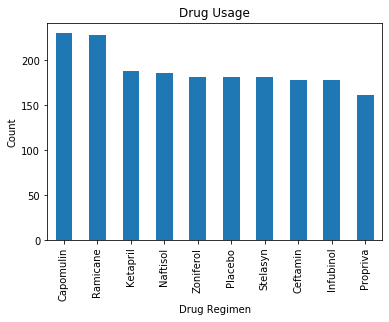

In [5]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
count = df['Drug Regimen'].value_counts()
count.plot(kind='bar')
plt.xlabel("Drug Regimen")
plt.ylabel("Count")
plt.title("Drug Usage")
plt.show()

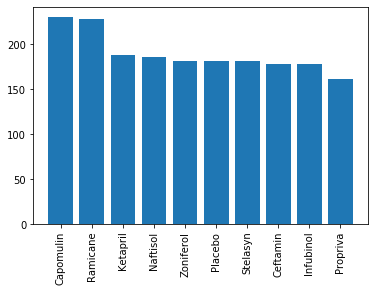

In [6]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
count = df['Drug Regimen'].value_counts()
plt.bar(count.index.values, count.values)
plt.xticks(rotation=90)
plt.show()

## Pie plots

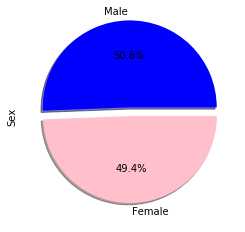

In [7]:
gender_count = df["Sex"].value_counts()
x = gender_count
labels = ('Male', 'Female')
explode = (0.1, 0)
colors = ('blue', 'pink')
gender_count.plot.pie(explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=0)
plt.show()

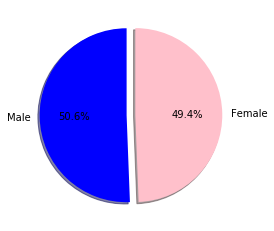

In [8]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_count = df["Sex"].value_counts()
x = gender_count
labels = ('Male', 'Female')
explode = (0.1, 0)
colors = ('blue', 'pink')
plt.pie(x, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.show()

## Quartiles, outliers and boxplots

In [9]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers
max_tumor = df.groupby(['Mouse ID'])['Tumor Volume (mm3)'].max()
max_tumor = max_tumor.reset_index()
mergedata = max_tumor[['Mouse ID','Tumor Volume (mm3)']].merge(df, on=['Mouse ID','Tumor Volume (mm3)'],how="left")
capomulin = mergedata.loc[mergedata["Drug Regimen"] == "Capomulin"]['Tumor Volume (mm3)']
ramicane = mergedata.loc[mergedata["Drug Regimen"] == "Ramicane"]['Tumor Volume (mm3)']
infubinol = mergedata.loc[mergedata["Drug Regimen"] == "Infubinol"]['Tumor Volume (mm3)']
ceftamin = mergedata.loc[mergedata["Drug Regimen"] == "Ceftamin"]['Tumor Volume (mm3)']
pdrugs = [capomulin, ramicane, infubinol, ceftamin]
pdrugs

[19     45.651331
 24     45.000000
 61     45.000000
 64     46.304003
 66     46.809225
 81     47.685963
 84     45.595685
 86     48.158209
 88     46.408361
 109    48.070452
 116    46.154737
 122    45.000000
 125    46.414518
 163    46.539206
 164    45.781746
 170    47.373423
 175    45.000000
 181    45.000000
 184    46.749006
 193    47.212200
 205    45.704434
 209    45.000000
 221    45.893720
 227    45.473753
 240    45.000000
 Name: Tumor Volume (mm3), dtype: float64, 6      45.466677
 7      45.000000
 10     45.000000
 12     46.910892
 33     45.722279
 37     46.940945
 45     45.000000
 52     46.409084
 70     45.851531
 77     45.000000
 78     45.000000
 92     45.252534
 94     46.343832
 97     45.000000
 120    45.000000
 127    45.521875
 158    45.766111
 159    46.585433
 167    45.625802
 169    45.568211
 178    45.000000
 191    47.622816
 218    45.000000
 236    46.378092
 245    45.000000
 Name: Tumor Volume (mm3), dtype: float64, 0      67.97341

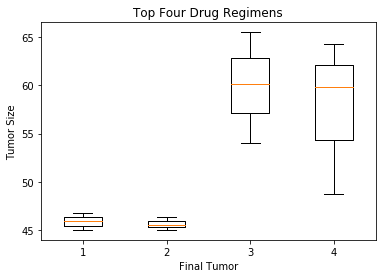

In [13]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
quartiles1 = capomulin.quantile([.25,.5,.75])
lowerq = quartiles1[0.25]
upperq = quartiles1[0.75]
iqr = upperq-lowerq
quartiles2 = ramicane.quantile([.25,.5,.75])
lowerq = quartiles2[0.25]
upperq = quartiles2[0.75]
iqr = upperq-lowerq
quartiles3 = infubinol.quantile([.25,.5,.75])
lowerq = quartiles3[0.25]
upperq = quartiles3[0.75]
iqr = upperq-lowerq
quartiles4 = ceftamin.quantile([.25,.5,.75])
lowerq = quartiles4[0.25]
upperq = quartiles4[0.75]
iqr = upperq-lowerq
quartilestotal= [quartiles1, quartiles2, quartiles3, quartiles4]
fig, ax1 = plt.subplots()
ax1.boxplot(quartilestotal)
ax1.set_title('Top Four Drug Regimens')
ax1.set_xlabel("Final Tumor")
ax1.set_ylabel("Tumor Size")
plt.show()

## Line and scatter plots

In [14]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

plt.plot(quartiles)
plt.show()


NameError: name 'quartiles' is not defined

In [16]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulinavg = data_table[['Tumor Volume (mm3)','Capomulin']]
df.plot(kind='scatter', x='Weight (g)', y='Tumor Volume (mm3)', color='green')

KeyError: "None of [Index(['Tumor Volume (mm3)', 'Capomulin'], dtype='object')] are in the [columns]"

In [ ]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
